# Non-residential building HVAC system

## Data analysis

### Import libraries

In [40]:
import numpy as np
import pandas as pd

### Import data

In [41]:
data = pd.read_csv("../../data/HVAC_NE_EC_19-21.csv");

### Inspect data

In [42]:
data.describe()

,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power
count,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000
mean,20.436936,19.994425,22.302290,18.580051,12.414164,45.433972,37.251636,73.803308,5.769196,2.308225
std,3.535683,2.357756,0.745301,2.237516,4.925918,10.765867,11.253552,21.116373,6.074394,2.432835
min,12.264999,12.344999,18.500000,12.300000,2.300000,19.939999,11.730000,11.000000,0.000000,0.000000
25%,17.879999,18.389999,22.500000,17.260000,8.900000,37.709999,29.420000,60.000000,0.000000,0.000000
50%,19.785000,20.385000,22.500000,18.059999,11.800000,44.669998,36.230000,78.500000,0.000000,0.000000
75%,23.256249,21.699999,22.500000,20.180000,15.300000,51.180000,43.329998,93.000000,12.000000,4.980000
max,30.295000,25.990000,23.500000,26.400000,32.799999,84.699997,78.699997,100.000000,15.000000,5.316000


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33888 entries, 0 to 33887
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     33888 non-null  object 
 1   T_Supply      33888 non-null  float64
 2   T_Return      33888 non-null  float64
 3   SP_Return     33888 non-null  float64
 4   T_Saturation  33888 non-null  float64
 5   T_Outdoor     33888 non-null  float64
 6   RH_Supply     33888 non-null  float64
 7   RH_Return     33888 non-null  float64
 8   RH_Outdoor    33888 non-null  float64
 9   Energy        33888 non-null  float64
 10  Power         33888 non-null  float64
dtypes: float64(10), object(1)
memory usage: 2.8+ MB


In [44]:
data.head()

,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power
0,2019-10-15 00:00:00+02:00,19.859999,20.469999,18.5,19.02,20.299999,71.110001,58.919998,79.5,0.0,0.0
1,2019-10-15 00:15:00+02:00,19.855000,20.430000,18.5,19.02,20.299999,71.320000,59.000000,82.0,0.0,0.0
2,2019-10-15 00:30:00+02:00,19.850000,20.410000,18.5,19.02,20.299999,71.470001,59.109997,79.5,0.0,0.0
3,2019-10-15 00:45:00+02:00,19.840000,20.379999,18.5,19.08,20.299999,71.439995,59.309998,77.0,0.0,0.0
4,2019-10-15 01:00:00+02:00,19.830000,20.350000,18.5,19.08,20.299999,71.580002,59.559998,79.5,0.0,0.0


In [45]:
data.tail()

,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power
33883,2021-04-14 22:45:00+02:00,19.539999,20.004999,20.5,19.619999,14.7,39.020000,27.930000,57.0,0.0,0.0
33884,2021-04-14 23:00:00+02:00,19.520000,19.949999,20.5,19.539999,13.7,39.020000,28.090000,57.0,0.0,0.0
33885,2021-04-14 23:15:00+02:00,19.430000,19.955000,20.5,19.420000,13.7,39.399998,27.930000,57.0,0.0,0.0
33886,2021-04-14 23:30:00+02:00,19.420000,19.920000,20.5,19.400000,13.7,39.599998,28.039999,57.0,0.0,0.0
33887,2021-04-14 23:45:00+02:00,19.420000,19.900000,20.5,19.400000,13.7,39.599998,28.150000,57.0,0.0,0.0


#### Check for missing values

In [46]:
data.isna().sum()

Timestamp       0
T_Supply        0
T_Return        0
SP_Return       0
T_Saturation    0
T_Outdoor       0
RH_Supply       0
RH_Return       0
RH_Outdoor      0
Energy          0
Power           0
dtype: int64

#### Convert date column to datetime type

In [47]:
data.Timestamp

0        2019-10-15 00:00:00+02:00
1        2019-10-15 00:15:00+02:00
2        2019-10-15 00:30:00+02:00
3        2019-10-15 00:45:00+02:00
4        2019-10-15 01:00:00+02:00
                   ...            
33883    2021-04-14 22:45:00+02:00
33884    2021-04-14 23:00:00+02:00
33885    2021-04-14 23:15:00+02:00
33886    2021-04-14 23:30:00+02:00
33887    2021-04-14 23:45:00+02:00
Name: Timestamp, Length: 33888, dtype: object

In [48]:
data.loc[data["Timestamp"].str.contains("+02:00", regex=False), "Timestamp"].count()

5200

In [49]:
data.loc[data["Timestamp"].str.contains("+01:00", regex=False), "Timestamp"].count()

28688

There are two different time zones. Data from different time zones should not be mixed. 

In [50]:
total_data_points = data.shape[0];
tz1_data_points = data.loc[data["Timestamp"].str.contains("+01:00", regex=False), "Timestamp"].count();
tz2_data_points = data.loc[data["Timestamp"].str.contains("+02:00", regex=False), "Timestamp"].count();

In [51]:
print("Time Zone | Data points | %");
print("------------------------------");
print(f"TZ 1      |   {tz1_data_points}     | {np.round(tz1_data_points / total_data_points * 100, 2)}");
print(f"TZ 2      |   {tz2_data_points}      | {np.round(tz2_data_points / total_data_points * 100, 2)}");

Time Zone | Data points | %
------------------------------
TZ 1      |   28688     | 84.66
TZ 2      |   5200      | 15.34


Two different datasets will be created: one containing the data from the 1st time zone, and another one with the data from the 2nd time zone.

In [52]:
data_tz1 = data.loc[data["Timestamp"].str.contains("+01:00", regex=False)].copy();
data_tz2 = data.loc[data["Timestamp"].str.contains("+02:00", regex=False)].copy();

Check that the lengths are correct:

In [53]:
print(f"Time zone 1: {data_tz1.shape[0]} data points.");
print(f"Time zone 2: {data_tz2.shape[0]} data points.");

Time zone 1: 28688 data points.
Time zone 2: 5200 data points.


In [54]:
data_tz1.head()

,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power
1160,2019-10-27 02:00:00+01:00,20.385000,20.619999,22.5,20.340000,15.3,70.869995,63.930000,88.0,0.0,0.0
1161,2019-10-27 02:15:00+01:00,20.375000,20.605000,22.5,20.340000,15.3,70.869995,64.049995,88.0,0.0,0.0
1162,2019-10-27 02:30:00+01:00,20.375000,20.600000,22.5,20.340000,15.3,70.909996,64.159996,88.0,0.0,0.0
1163,2019-10-27 02:45:00+01:00,20.334999,20.590000,22.5,20.320000,15.3,70.930000,64.320000,88.0,0.0,0.0
1164,2019-10-27 03:00:00+01:00,20.324999,20.580000,22.5,20.299999,15.3,70.930000,64.830002,88.0,0.0,0.0


In [55]:
data_tz1.tail()

,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power
32347,2021-03-27 22:45:00+01:00,20.814999,21.320000,21.5,21.299999,16.6,50.739998,40.189999,77.0,0.0,0.0
32348,2021-03-27 23:00:00+01:00,20.814999,21.309999,21.5,21.279999,16.6,50.759998,40.180000,79.5,0.0,0.0
32349,2021-03-27 23:15:00+01:00,20.814999,21.299999,21.5,21.260000,16.6,50.759998,40.209999,82.0,0.0,0.0
32350,2021-03-27 23:30:00+01:00,20.814999,21.289999,21.5,21.240000,16.6,50.750000,40.239998,82.0,0.0,0.0
32351,2021-03-27 23:45:00+01:00,20.814999,21.279999,21.5,21.240000,15.6,50.750000,40.279999,82.0,0.0,0.0


In [56]:
data_tz2.head()

,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power
0,2019-10-15 00:00:00+02:00,19.859999,20.469999,18.5,19.02,20.299999,71.110001,58.919998,79.5,0.0,0.0
1,2019-10-15 00:15:00+02:00,19.855000,20.430000,18.5,19.02,20.299999,71.320000,59.000000,82.0,0.0,0.0
2,2019-10-15 00:30:00+02:00,19.850000,20.410000,18.5,19.02,20.299999,71.470001,59.109997,79.5,0.0,0.0
3,2019-10-15 00:45:00+02:00,19.840000,20.379999,18.5,19.08,20.299999,71.439995,59.309998,77.0,0.0,0.0
4,2019-10-15 01:00:00+02:00,19.830000,20.350000,18.5,19.08,20.299999,71.580002,59.559998,79.5,0.0,0.0


In [57]:
data_tz2.tail()

,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power
33883,2021-04-14 22:45:00+02:00,19.539999,20.004999,20.5,19.619999,14.7,39.020000,27.930000,57.0,0.0,0.0
33884,2021-04-14 23:00:00+02:00,19.520000,19.949999,20.5,19.539999,13.7,39.020000,28.090000,57.0,0.0,0.0
33885,2021-04-14 23:15:00+02:00,19.430000,19.955000,20.5,19.420000,13.7,39.399998,27.930000,57.0,0.0,0.0
33886,2021-04-14 23:30:00+02:00,19.420000,19.920000,20.5,19.400000,13.7,39.599998,28.039999,57.0,0.0,0.0
33887,2021-04-14 23:45:00+02:00,19.420000,19.900000,20.5,19.400000,13.7,39.599998,28.150000,57.0,0.0,0.0


Apparently, the data points from time zone 2 ... . For now, let us restrict our analysis to the data points from time zone 1.

In [58]:
data_tz1["Timestamp"] = pd.to_datetime(data_tz1.Timestamp.str.replace("+01:00", ""));

In [59]:
data_tz1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28688 entries, 1160 to 32351
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Timestamp     28688 non-null  datetime64[ns]
 1   T_Supply      28688 non-null  float64       
 2   T_Return      28688 non-null  float64       
 3   SP_Return     28688 non-null  float64       
 4   T_Saturation  28688 non-null  float64       
 5   T_Outdoor     28688 non-null  float64       
 6   RH_Supply     28688 non-null  float64       
 7   RH_Return     28688 non-null  float64       
 8   RH_Outdoor    28688 non-null  float64       
 9   Energy        28688 non-null  float64       
 10  Power         28688 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 2.6 MB


### Reset the index

In [60]:
data_tz1 = data_tz1.reset_index().drop(columns=["index"]);

### Save curated dataset

In [77]:
data_tz1.to_parquet("../../data/curated/non_residential_building_curated.parquet.gzip", compression="gzip");

## Data visualisation

### Time plots

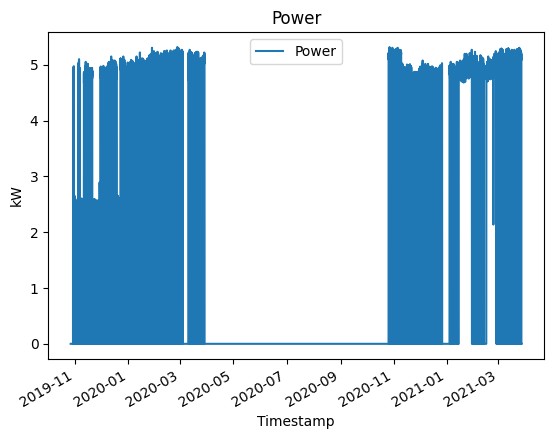

In [68]:
data_tz1.plot(x="Timestamp", y="Power", title="Power", ylabel="kW");

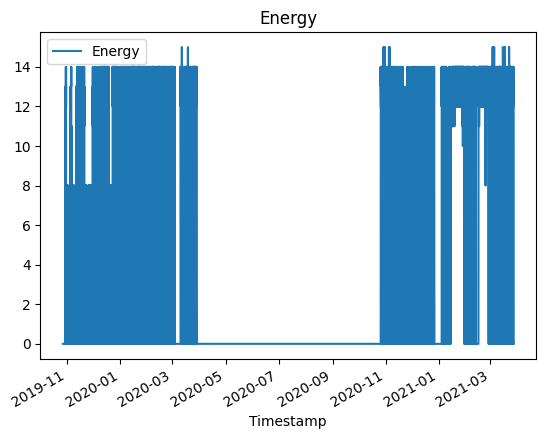

In [67]:
data_tz1.plot(x="Timestamp", y="Energy", title="Energy");

From visual inspection, it is already clear that there is an anomaly in the data. Whether this is due to a sensor failure or some kind of anomalous pattern (e.g. holidays, so no one was at home) has yet to be determined.

In [69]:
data_tz1.columns

Index(['Timestamp', 'T_Supply', 'T_Return', 'SP_Return', 'T_Saturation',
       'T_Outdoor', 'RH_Supply', 'RH_Return', 'RH_Outdoor', 'Energy', 'Power'],
      dtype='object')

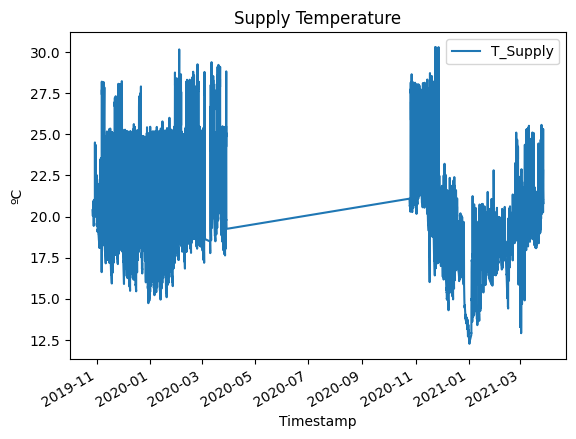

In [70]:
data_tz1.plot(x="Timestamp", y="T_Supply", title="Supply Temperature", ylabel="ºC");

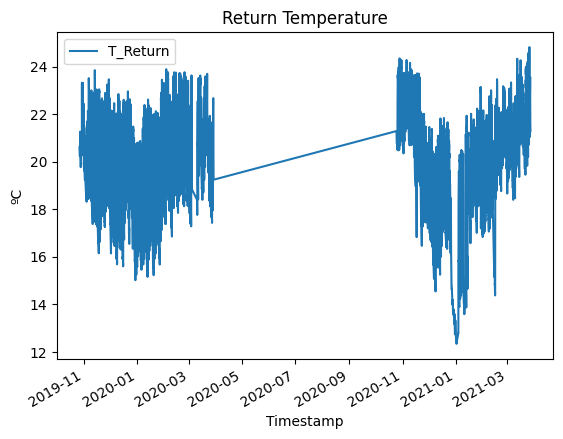

In [71]:
data_tz1.plot(x="Timestamp", y="T_Return", title="Return Temperature", ylabel="ºC");

These plots seem to suggest there was some sort of system failure.

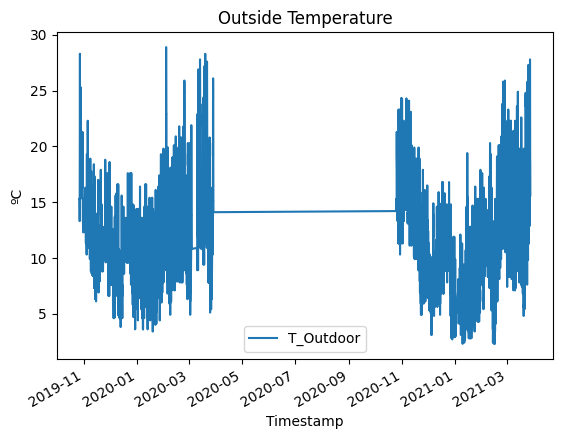

In [72]:
data_tz1.plot(x="Timestamp", y="T_Outdoor", title="Outside Temperature", ylabel="ºC");

Something is definitely happening from April to October. The outside temperature most definitely did not remain the same for 6 months. This is obviously a sensor failure.

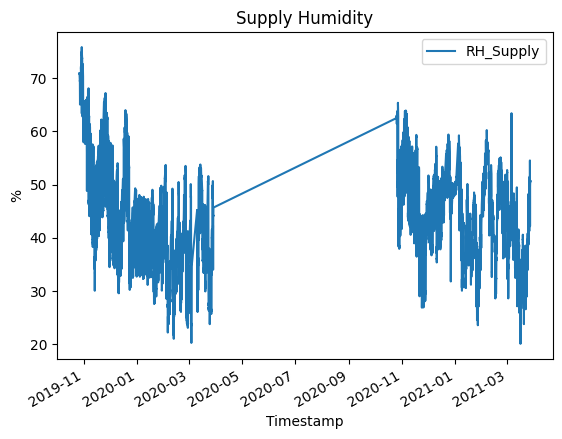

In [73]:
data_tz1.plot(x="Timestamp", y="RH_Supply", title="Supply Humidity", ylabel="%");

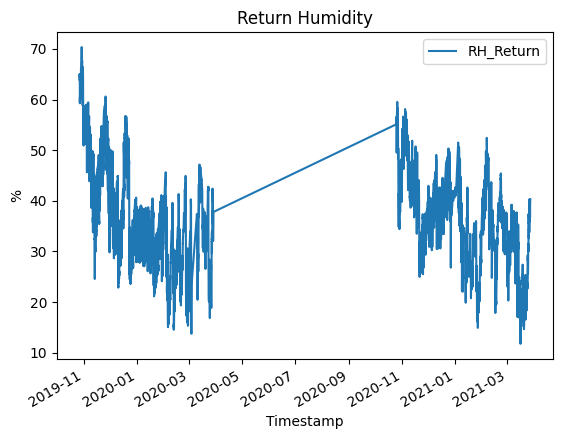

In [74]:
data_tz1.plot(x="Timestamp", y="RH_Return", title="Return Humidity", ylabel="%");

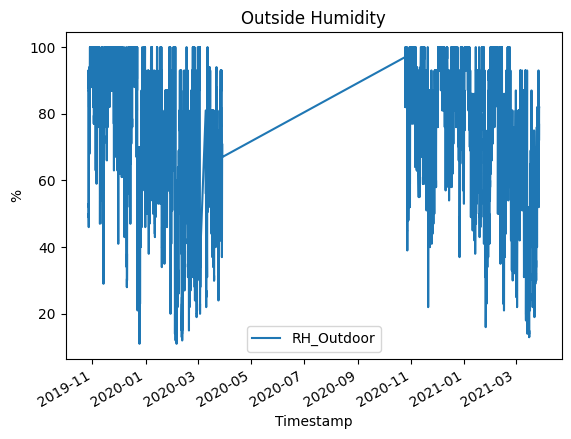

In [75]:
data_tz1.plot(x="Timestamp", y="RH_Outdoor", title="Outside Humidity", ylabel="%");

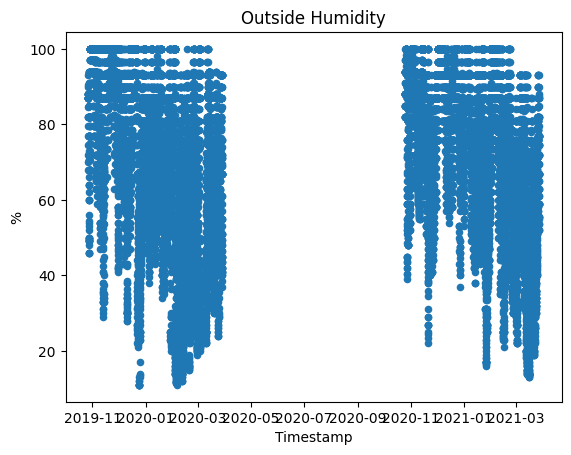

In [189]:
data_tz1.plot(kind="scatter", x="Timestamp", y="RH_Outdoor", title="Outside Humidity", ylabel="%");

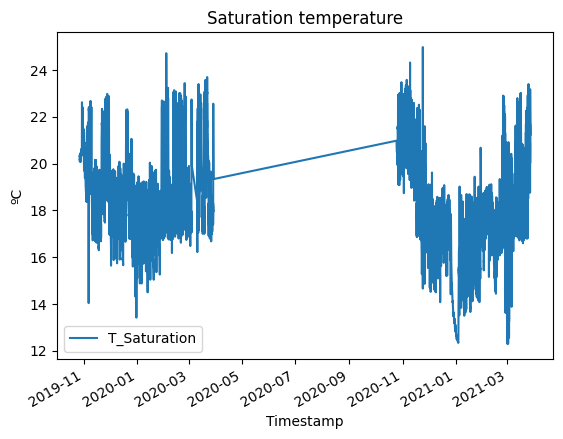

In [76]:
data_tz1.plot(x="Timestamp", y="T_Saturation", title="Saturation temperature", ylabel="ºC");

An anomalous situation definitely took place from April to October, as the is no data for that period of time. As this is not the sort of anomaly we are looking for, this period will be excluded from further analysis.

## Data cleaning

Two different datasets will be created. One containing data from November 2019 to March 2020, and another one relative to the data collected from November 2020 to March 2021.

In [95]:
discarded_data_points = data_tz1.loc[(data_tz1["Timestamp"] > "2020-03") & (data_tz1["Timestamp"] < "2020-11"), "Timestamp"].count();

In [96]:
print(f"{discarded_data_points} data points will be discarded ({np.round(discarded_data_points / data_tz1.shape[0] * 100, 2)} % of the avaliable data for time zone 1).");

2775 data points will be discarded (9.67 % of the avaliable data for time zone 1).


In [142]:
data_tz1.loc[(data_tz1["Timestamp"] >= "2020-04") & (data_tz1["Timestamp"] < "2020-11")]

,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power
14200,2020-10-25 02:00:00,21.084999,21.289999,22.5,20.980000,14.2,62.480000,55.110001,97.0,0.0,0.0
14201,2020-10-25 02:15:00,21.064999,21.264999,22.5,20.959999,14.2,62.469997,55.169998,94.0,0.0,0.0
14202,2020-10-25 02:30:00,21.055000,21.240000,22.5,20.939999,14.2,62.520000,55.299999,94.0,0.0,0.0
14203,2020-10-25 02:45:00,21.055000,21.219999,22.5,20.920000,15.2,62.520000,55.369999,94.0,0.0,0.0
14204,2020-10-25 03:00:00,20.994999,21.154999,22.5,20.859999,15.2,62.549999,55.459999,94.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14859,2020-10-31 22:45:00,21.285000,21.605000,22.5,21.400000,14.3,57.500000,54.209999,100.0,0.0,0.0
14860,2020-10-31 23:00:00,21.270000,21.549999,22.5,21.359999,14.3,57.619999,54.199997,100.0,0.0,0.0
14861,2020-10-31 23:15:00,21.254999,21.520000,22.5,21.340000,13.3,57.660000,54.149998,100.0,0.0,0.0
14862,2020-10-31 23:30:00,21.215000,21.494999,22.5,21.320000,14.3,57.699997,54.149998,100.0,0.0,0.0


There are no records from March 28th to October 25th, 2020. This explains the anomalous behaviour: those data points were interpolated!

In [151]:
dataset1 = data_tz1.loc[data_tz1["Timestamp"] < "2020-04"].copy();
dataset2 = data_tz1.loc[data_tz1["Timestamp"] > "2020-10"].copy();

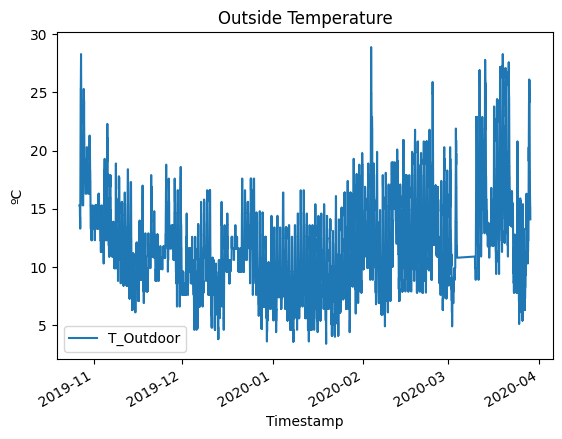

In [187]:
dataset1.plot(x="Timestamp", y="T_Outdoor", title="Outside Temperature", ylabel="ºC");

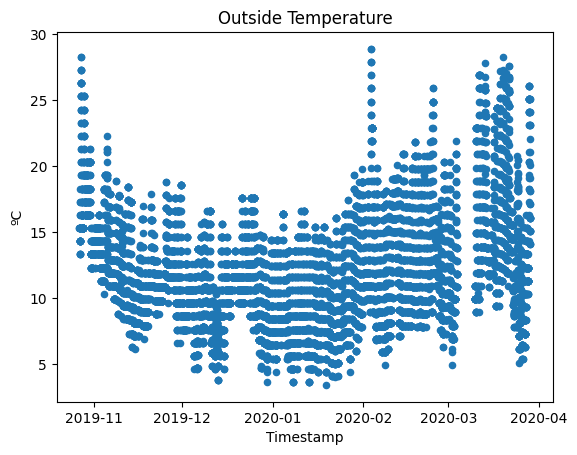

In [188]:
dataset1.plot(kind="scatter", x="Timestamp", y="T_Outdoor", title="Outside Temperature", ylabel="ºC");

In [175]:
#(data_tz1["Timestamp"].iloc[data_tz1.shape[0] - 1] - data_tz1["Timestamp"].iloc[0]).total_seconds() / (15*60)

In [174]:
#data_tz1.shape[0]

In [176]:
(dataset1["Timestamp"].iloc[dataset1.shape[0] - 1] - dataset1["Timestamp"].iloc[0]).total_seconds() / (15*60)

14775.0

In [177]:
dataset1.shape[0]

14200

There are still some missing values in this subset of the data. This seems to be confirmed be the outside temperature plot.

In [184]:
(dataset2["Timestamp"].iloc[dataset2.shape[0] - 1] - dataset2["Timestamp"].iloc[0]).total_seconds() / (15*60)

14775.0

In [180]:
dataset2.shape[0]

14488

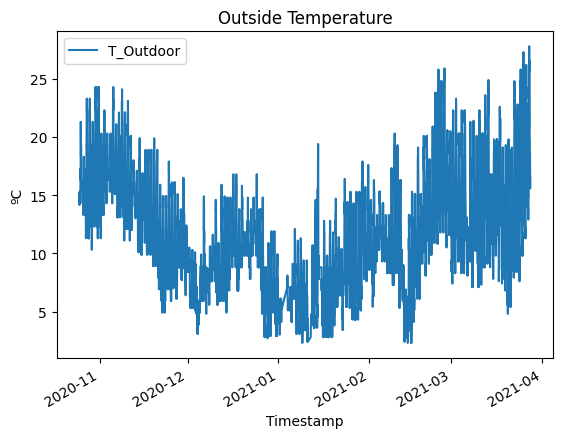

In [181]:
dataset2.plot(x="Timestamp", y="T_Outdoor", title="Outside Temperature", ylabel="ºC");

There are some missing values in this subset too.